In [1]:
import numpy as np
from sklearn.datasets import make_regression
from DecisionTreeRegressor import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Single feature

In [2]:
x = np.linspace(-3, 3, 10 ** 3).reshape(-1, 1)
y = np.sin(x).reshape(-1) + np.random.standard_normal(10 ** 3) * 0.4

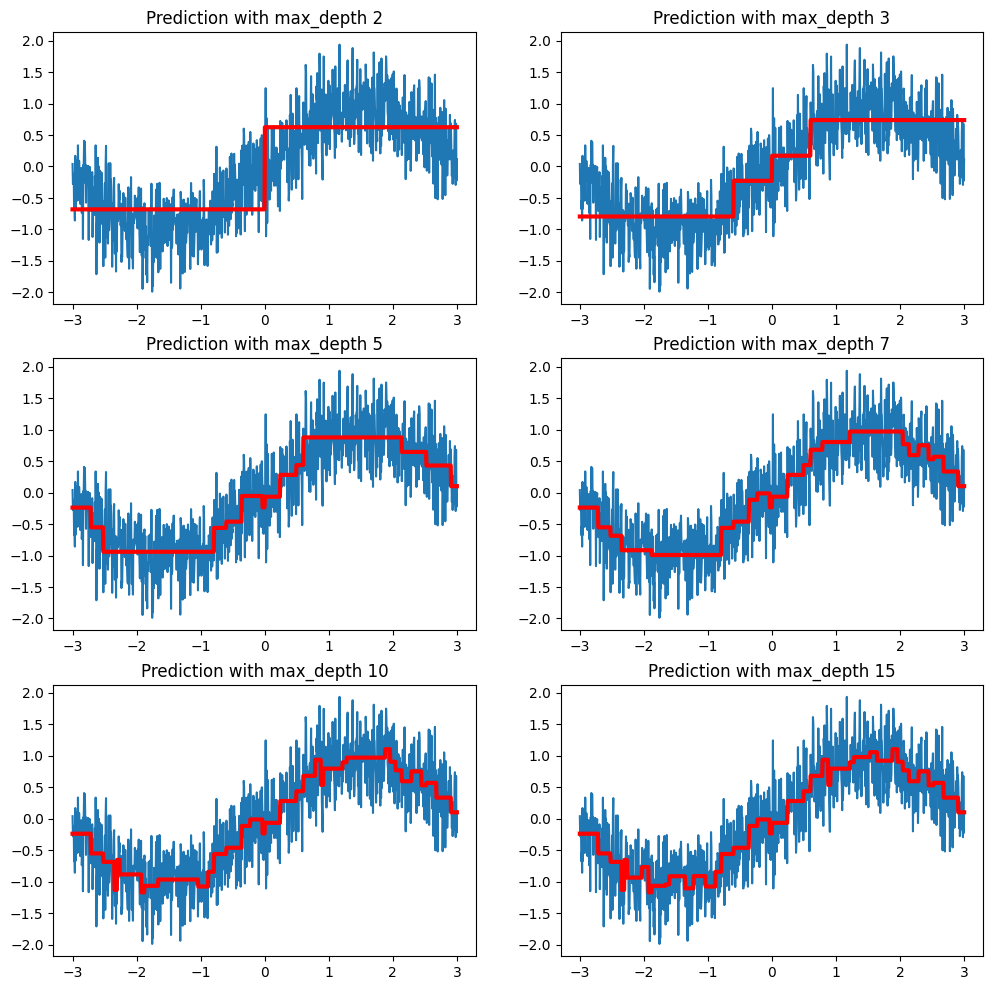

In [3]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
depths = [2, 3, 5, 7, 10, 15]
for i in range(3):
    for j in range(2):
        model = DecisionTreeRegressor(
            max_depth=depths[2 * i + j],
            loss="MSE",
            random_state = 42,
            min_samples_split=50
        )
        model.fit(x, y)
        y_pred = model.predict(x)
        ax[i, j].set_title(f"Prediction with max_depth {depths[2 * i + j]}")
        ax[i, j].plot(x, y)
        ax[i, j].plot(x, y_pred, color="red", lw=3)

# Two features

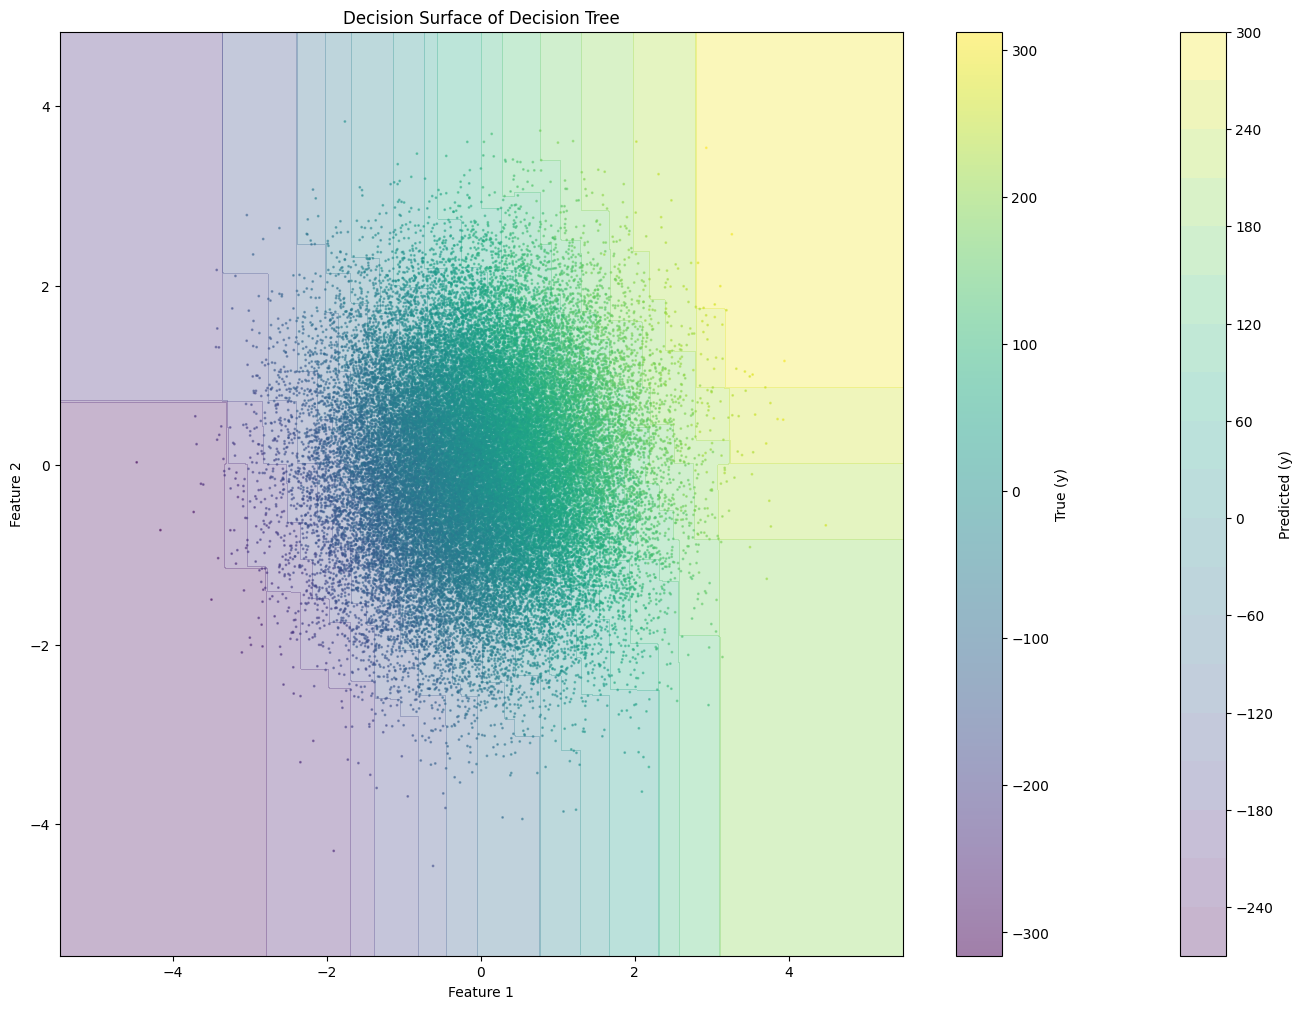

In [4]:
X, y = make_regression(
    n_samples=5 * 10 ** 4,
    n_features=2,
    noise=10,
    random_state=42
)

tree = DecisionTreeRegressor(
    max_depth=10,
    random_state=42,
    loss="MSE",
    min_samples_split=20
)
tree.fit(X, y)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                       np.linspace(x2_min, x2_max, 500))

Z = tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

fig, ax = plt.subplots(figsize=(17, 12))

contour = ax.contourf(xx1, xx2, Z, levels=20, cmap='viridis', alpha=0.3)
plt.colorbar(contour, label='Predicted (y)')

sc = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.5, s=1, label='Data')
plt.colorbar(sc, label='True (y)')

ax.set_title('Decision Surface of Decision Tree')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.show()

# Several features

In [5]:
X, y = make_regression(
    n_samples=10 ** 5,
    n_features=100,
    noise=50,
    random_state=42
)

tree = DecisionTreeRegressor(
    max_depth=15,
    random_state=42,
    loss="MSE",
    min_samples_split=50,
    max_features=15
)
tree.fit(X, y)

y_pred = tree.predict(X)


np.mean(
    (y_pred - y) ** 2
) ** 0.5

np.float64(93.38328954172434)